In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [66]:
df = pd.read_csv("AAPL_2006-01-01_to_2018-01-01.csv")

In [67]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [68]:
df.tail(5)

,Date,Open,High,Low,Close,Volume,Name
3014,2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL
3015,2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL
3016,2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL
3017,2017-12-28,171.00,171.85,170.48,171.08,16480187,AAPL
3018,2017-12-29,170.52,170.59,169.22,169.23,25999922,AAPL


In [69]:
# Rows and columns
df.shape

(3019, 7)

In [70]:
# Print all the column names
df.columns.to_list()

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name']

In [71]:
# Checking the number of entries for each day
count_df = df.groupby(['Date']).count()

In [72]:
count_df

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,1,1,1,1,1,1
2006-01-04,1,1,1,1,1,1
2006-01-05,1,1,1,1,1,1
2006-01-06,1,1,1,1,1,1
2006-01-09,1,1,1,1,1,1
...,...,...,...,...,...,...
2017-12-22,1,1,1,1,1,1
2017-12-26,1,1,1,1,1,1
2017-12-27,1,1,1,1,1,1


In [73]:
unique_counts = count_df["Low"].value_counts()

In [74]:
unique_counts

Low
1    3019
Name: count, dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


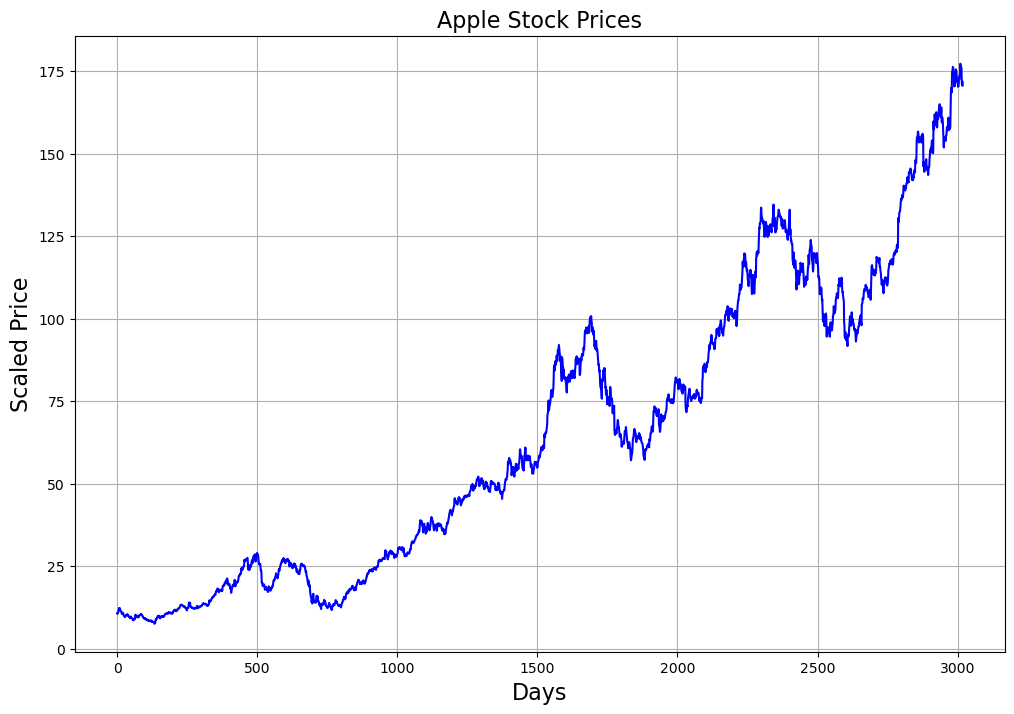

In [76]:
plt.figure(figsize=(12,8))                 
plt.plot(df["High"].values,c="blue")
plt.title("Apple Stock Prices",fontsize=16)
plt.xlabel("Days",fontsize=16)
plt.ylabel("Scaled Price",fontsize=16)
plt.grid()
plt.show()

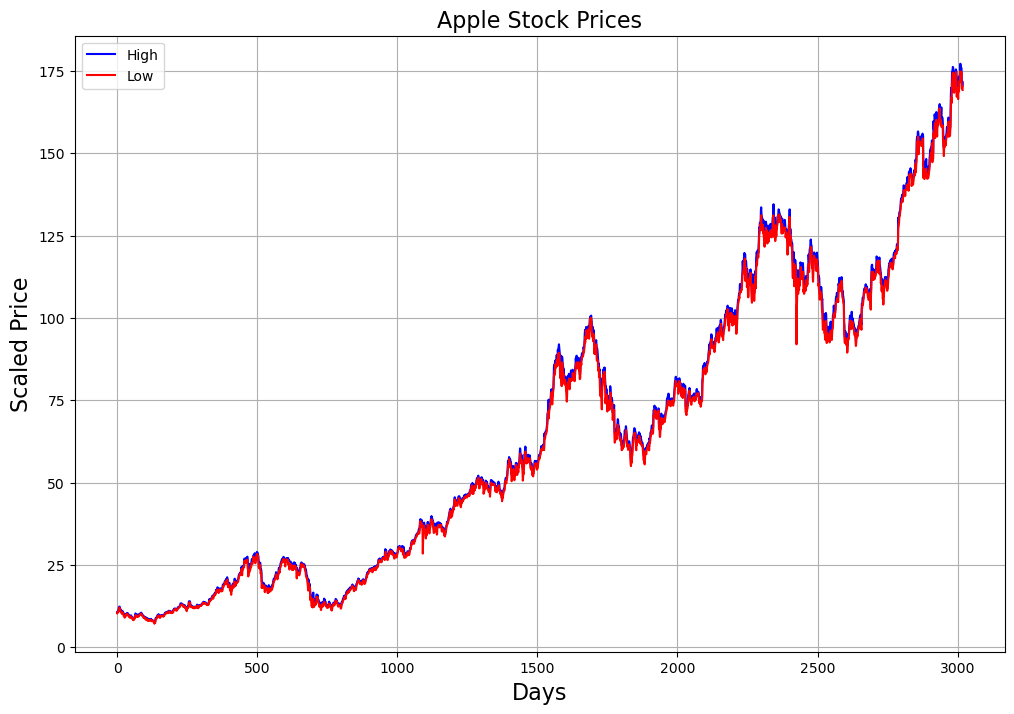

In [77]:
plt.figure(figsize=(12, 8))
plt.plot(df["High"].values, c="blue", label="High")
plt.plot(df["Low"].values, c="red", label="Low")
plt.title("Apple Stock Prices", fontsize=16)
plt.xlabel("Days", fontsize=16)
plt.ylabel("Scaled Price", fontsize=16)
plt.legend()
plt.grid()
plt.show()

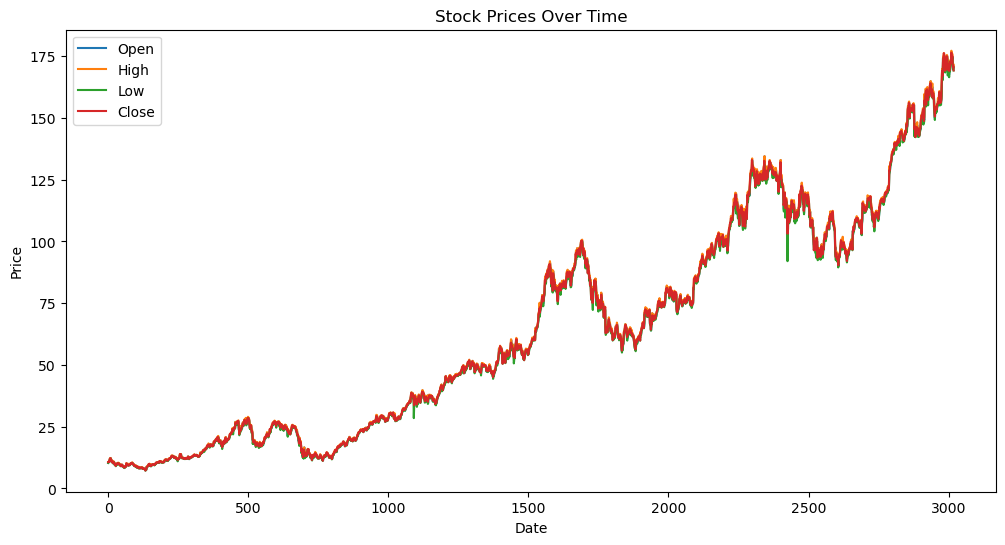

In [78]:
#df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime format
#df.set_index('Date', inplace=True)  # Set 'Date' as the index

# Plotting the stock prices
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Open'], label='Open')
plt.plot(df.index, df['High'], label='High')
plt.plot(df.index, df['Low'], label='Low')
plt.plot(df.index, df['Close'], label='Close')

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

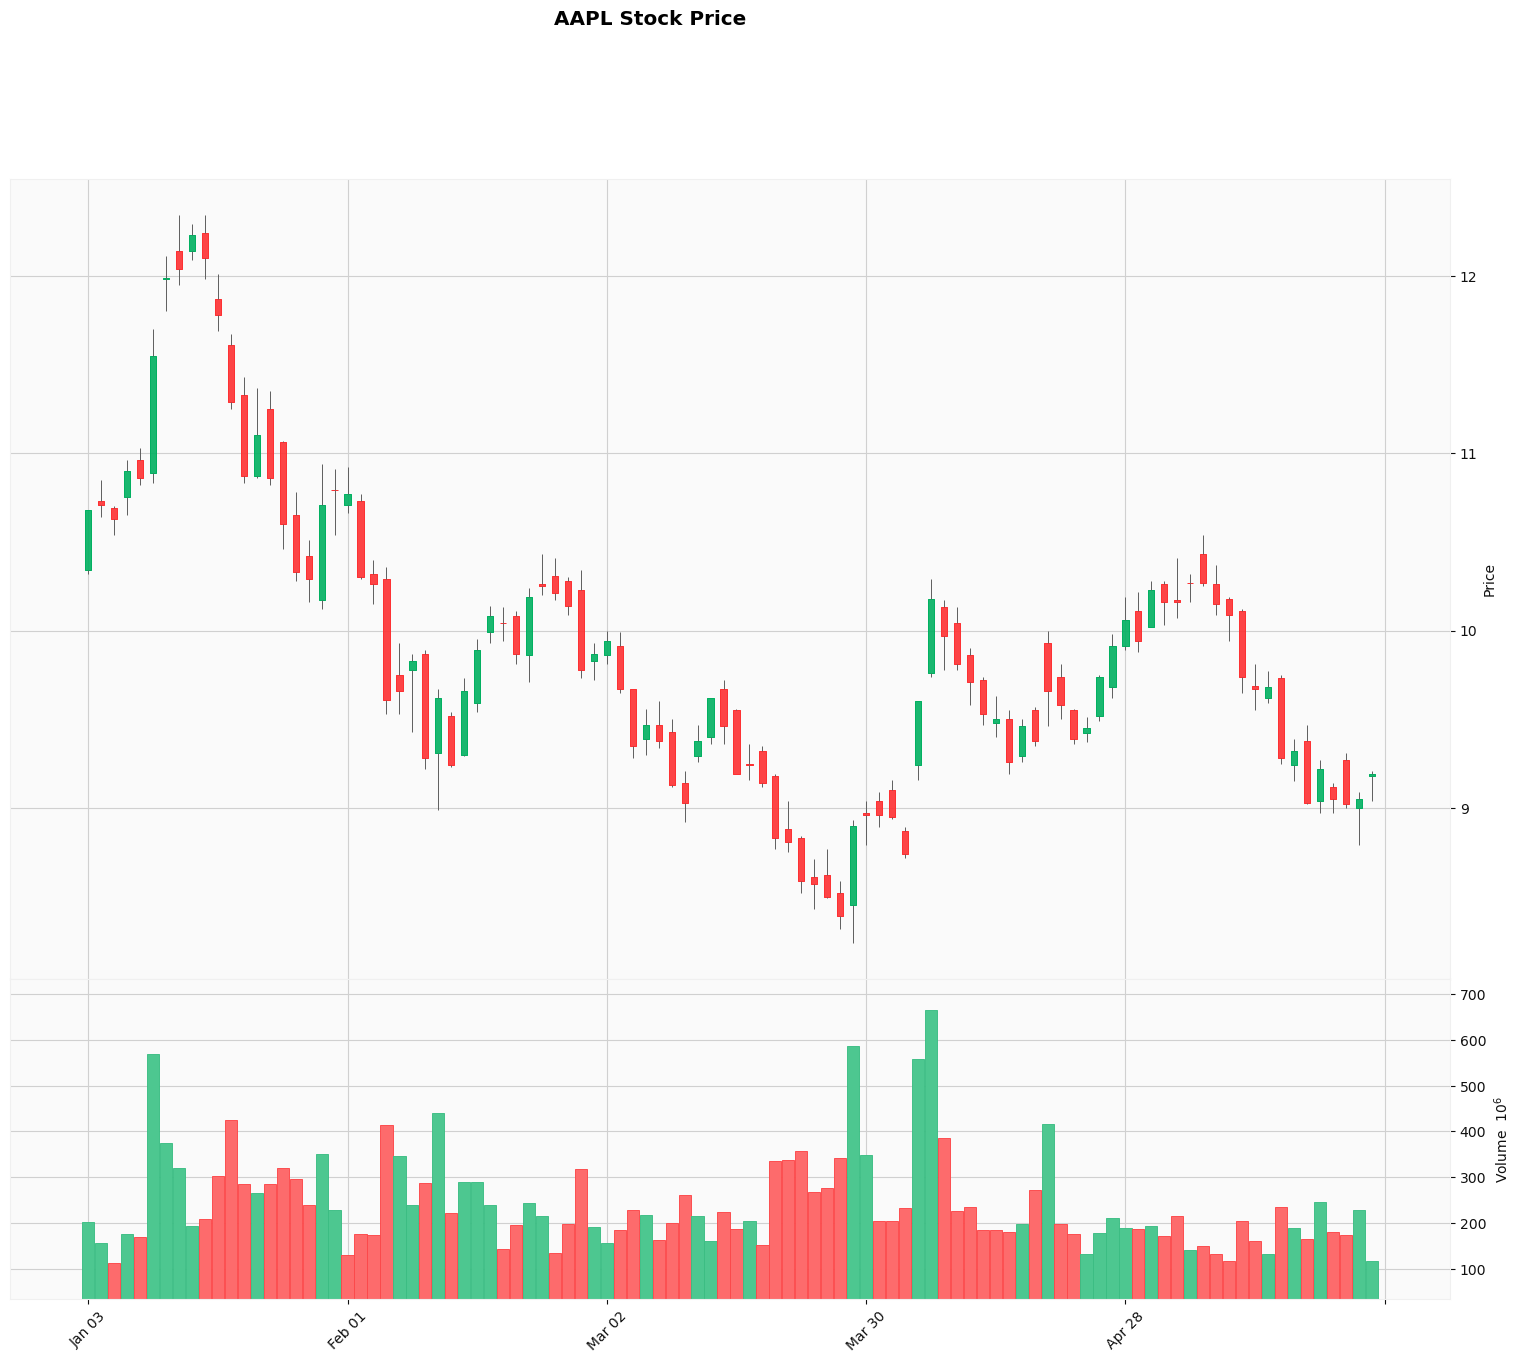

In [88]:
import mplfinance as mpf

# Filter the DataFrame for the specified date range
filtered_df = df[0:100]
# Assuming 'df' contains the stock price data
mpf.plot(filtered_df, type='candle', volume=True, style='yahoo', title='AAPL Stock Price', figsize=(20, 16))

/home/didar/anaconda3/envs/adml/lib/python3.11/site-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


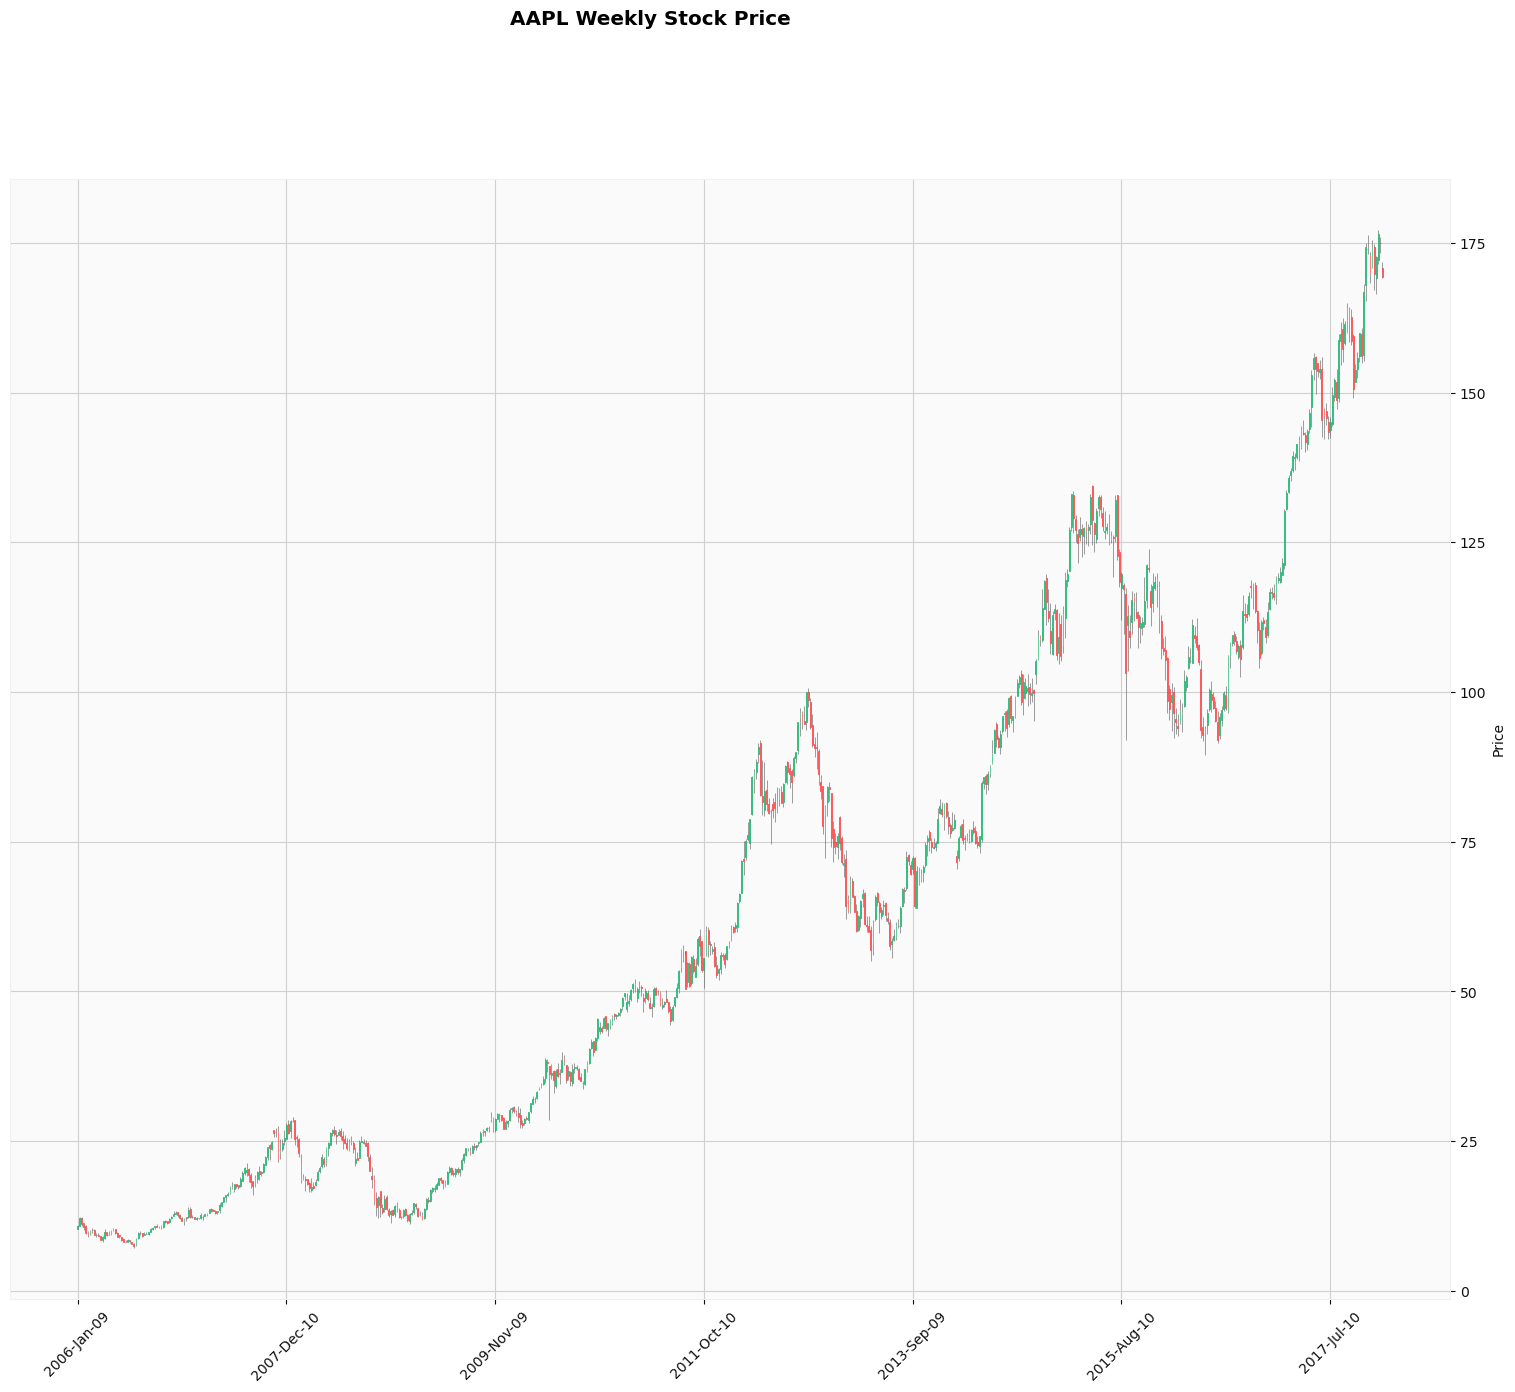

In [89]:
# Resample the data by week
weekly_data = df.resample('W-Mon').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

# Plot the candlestick chart for the resampled weekly data
mpf.plot(weekly_data, type='candle', style='yahoo', title='AAPL Weekly Stock Price', ylabel='Price', figsize=(20, 16))

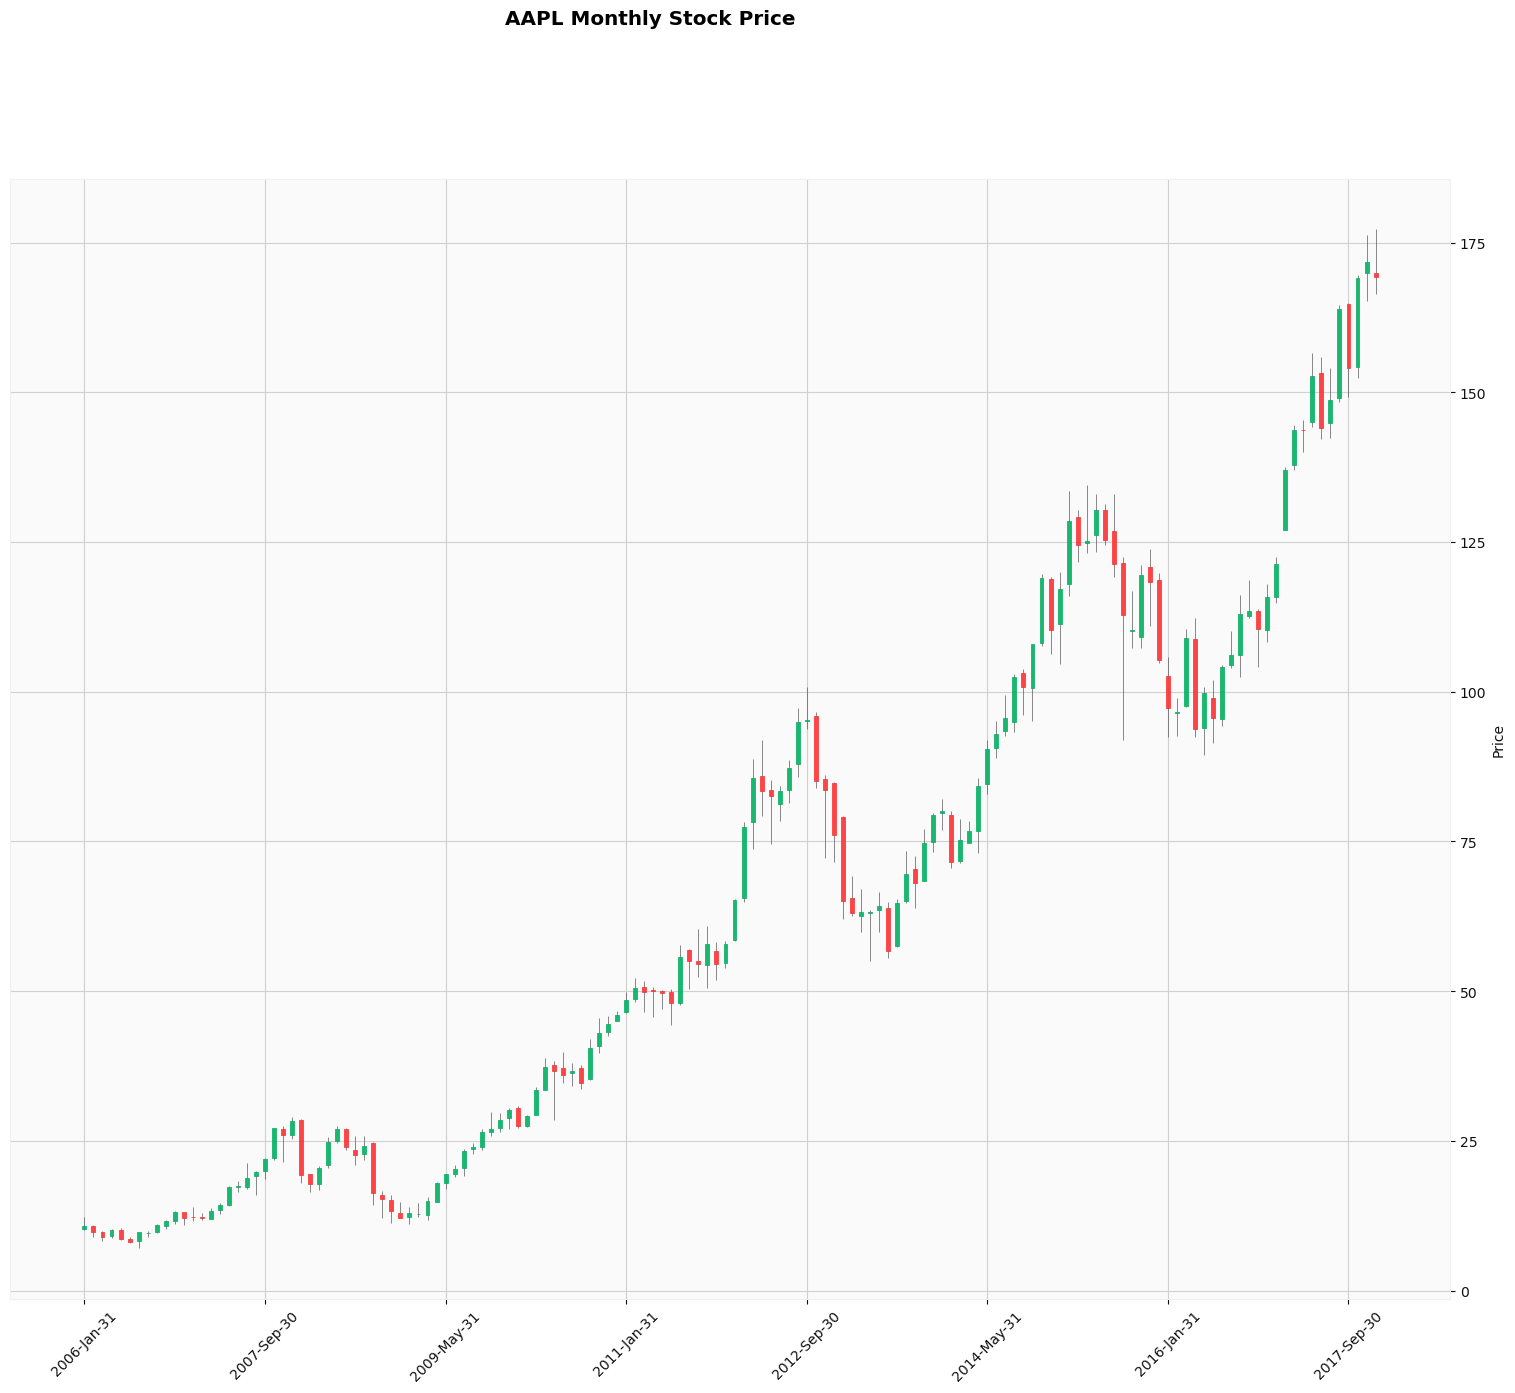

In [90]:
monthly_data = df.resample('M').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

# Plot the candlestick chart for the resampled monthly data
mpf.plot(monthly_data, type='candle', style='yahoo', title='AAPL Monthly Stock Price', ylabel='Price', figsize=(20, 16))

In [91]:
mpf.plot(df, type='volume', style='yahoo', title='AAPL Stock Volume', figsize=(20, 16))

TypeError: kwarg "type" validator returned False for value: "volume"
    'Validator'   : lambda value: value in _get_valid_plot_types() },

/home/didar/anaconda3/envs/adml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/didar/anaconda3/envs/adml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/didar/anaconda3/envs/adml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/didar/anaconda3/envs/adml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

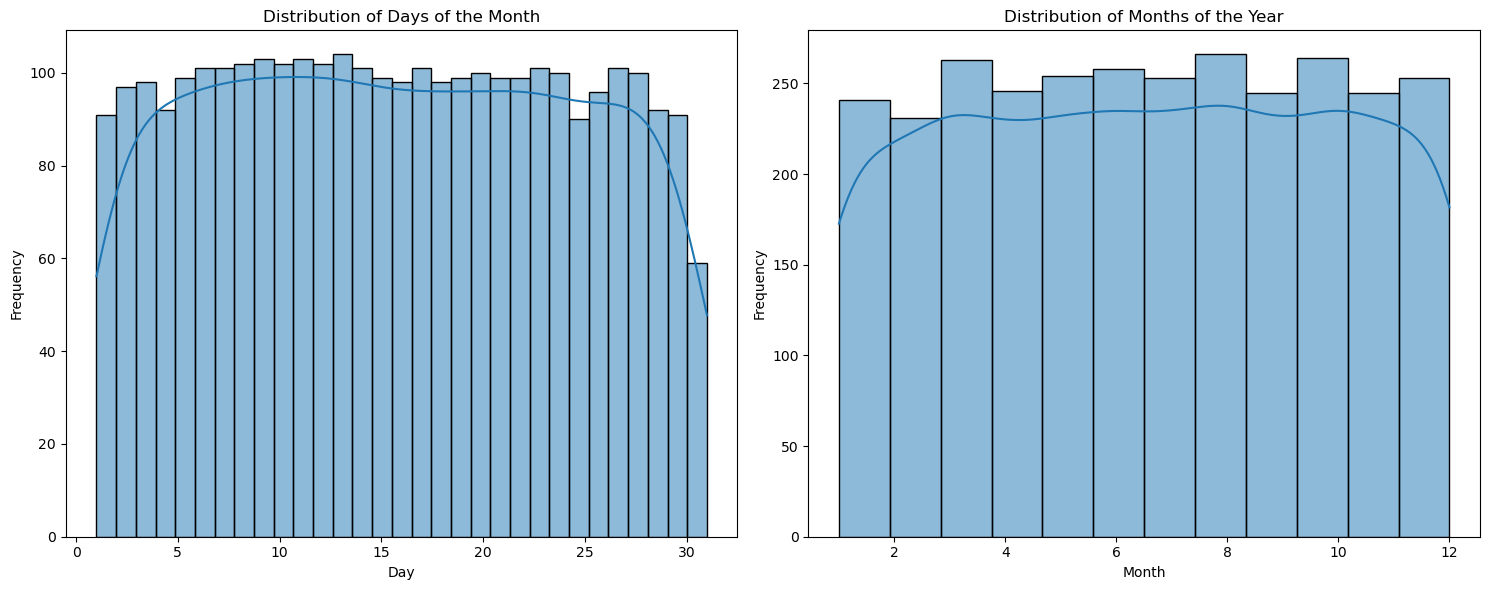

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract day of the month and month of the year
df['Day_of_month'] = df['Date'].dt.day
df['Month_of_year'] = df['Date'].dt.month

# Set up subplots for day of the month and month of the year
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Distribution plot for day of the month
sns.histplot(df['Day_of_month'], bins=31, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Days of the Month')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Frequency')

# Distribution plot for month of the year
sns.histplot(df['Month_of_year'], bins=12, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Months of the Year')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

/home/didar/anaconda3/envs/adml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/didar/anaconda3/envs/adml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/didar/anaconda3/envs/adml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/didar/anaconda3/envs/adml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

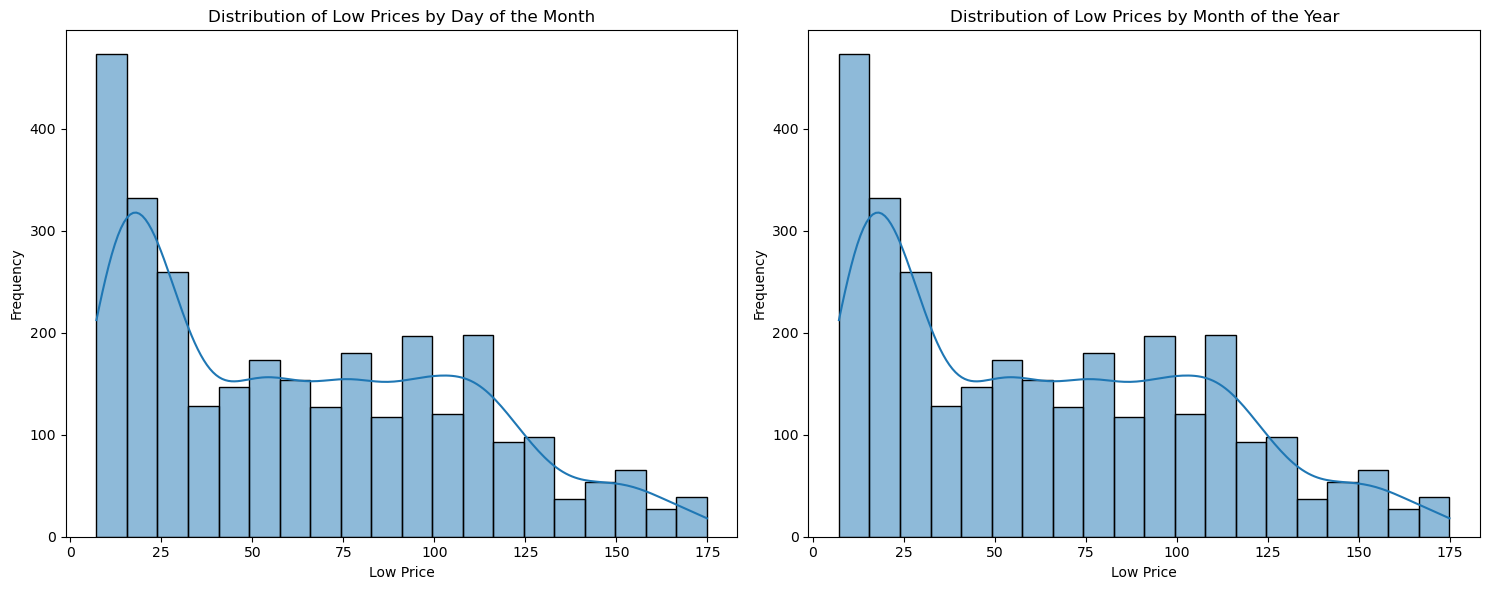

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'Date' as the index and 'Low' as the low prices
# Convert 'Date' to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Create a 'Day_of_month' and 'Month_of_year' columns
df['Day_of_month'] = df.index.day
df['Month_of_year'] = df.index.month

# Set up subplots for low prices by day and month
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Distribution plot for low prices by day of the month
sns.histplot(df['Low'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Low Prices by Day of the Month')
axes[0].set_xlabel('Low Price')
axes[0].set_ylabel('Frequency')

# Distribution plot for low prices by month of the year
sns.histplot(df['Low'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Low Prices by Month of the Year')
axes[1].set_xlabel('Low Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()